# _Experimentation: Regex & `re`_

**TL;DR** --> Explore Regex strategies for possible keywords related to instances of misinformation.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# import libraries
import fundamentals
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import string
import os
import re
from tqdm.autonotebook import tqdm
tqdm.pandas()

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

/opt/conda/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  
/opt/conda/envs/fastai/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## _Load Data_

In [2]:
# strings of file paths and file name for data
origpath = "/notebooks/CovidDisinfo-Detect/experiments"
datapath = "/notebooks/CovidDisinfo-Detect/data/interim"
filename = "covid19_20200324.pkl"

# load data into pandas dataframe
df = fundamentals.load_data(origpath, datapath, filename)

## _Initial Exploration with Regex & `re`_

In [13]:
# search for terms related to "chinese bioweapons"
def chinese_bioweapons(text):
    """
    Checks a given text for any occurrences of words chinese & bioweapopns
    """
    regex1 = re.compile(r"chinese|china", re.I)
    regex2 = re.compile(r"bioweapon|bioweapons", re.I)
    china = regex1.findall(text)
    bio = regex2.findall(text)
    return len(china), len(bio)

In [14]:
%%timeit

# how long does it take for the above to run
df["tweet"][:1].apply(lambda x: chinese_bioweapons(x))

457 µs ± 6.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
test = df["tweet"].progress_apply(lambda x: chinese_bioweapons(x))

In [16]:
test.value_counts()

(0, 0)     1855465
(1, 0)       50899
(2, 0)       14547
(3, 0)        3924
(4, 0)        1143
(5, 0)         431
(0, 1)         324
(6, 0)         154
(1, 1)          99
(7, 0)          62
(0, 2)          61
(2, 1)          45
(3, 1)          21
(2, 2)          15
(8, 0)          13
(9, 0)          12
(10, 0)          9
(11, 0)          5
(1, 2)           5
(4, 1)           5
(13, 0)          3
(0, 3)           1
(12, 0)          1
Name: tweet, dtype: int64

In [22]:
df[(test >= (1, 0)) & (test >= (0, 1))]

,id,conversation_id,user_id,username,name,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,retweet,quote_url,video,reply_to_userids,reply_to_usernames
created_at,,,,,,,,,,,,,,,,,,,
2020-03-23 06:59:30+00:00,1241877193892007939,1241877193892007936,2540306593,dgmroz,David Mroz,Daily reminder:\nCovid-19 began in Wuhan China...,none,none,none,0,0,1,none,https://twitter.com/dgmroz/status/124187719389...,False,none,0,2540306593,dgmroz
2020-03-23 06:59:23+00:00,1241877165651693573,1241877165651693568,348684510,faisal_kb,FAISAL BAAKEEL,What countries have been affected by the novel...,channelnewsasia,https://infographics.channelnewsasia.com/covid...,none,0,0,1,none,https://twitter.com/faisal_kb/status/124187716...,False,none,0,"348684510,38400130","faisal_kb,ChannelNewsAsia"
2020-03-23 06:59:16+00:00,1241877135926505472,1241877135926505472,810972591833743360,liziming117,Liziming Li,God! This is what is happening to Asian Americ...,none,none,https://pbs.twimg.com/media/ETwIq8LU8AAElxF.jpg,0,0,0,"#coronavirus,#covid19",https://twitter.com/liziming117/status/1241877...,False,none,0,810972591833743360,liziming117
2020-03-23 06:59:14+00:00,1241877128028684288,1241877128028684288,2756631619,wongmnc_ctrexdr,Mr. & Mrs. S.H. Wong Ctr. for the Study of MNCs,. Lots of priorities lately but #China has not...,none,https://lnkd.in/gxzcwnD,none,0,0,0,"#china,#covid,#fdi,#negativelist",https://twitter.com/WongMNC_CtrExDr/status/124...,False,none,0,2756631619,WongMNC_CtrExDr
2020-03-23 06:59:04+00:00,1241877083816488961,1241873356032323584,740783784484823040,mirandagemini,Matt at Home 🇦🇺,Not to mention that we already have a name for...,natalietran,none,none,2,1,86,none,https://twitter.com/MirandaGemini/status/12418...,False,none,0,"740783784484823040,21191567","MirandaGemini,natalietran"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20 08:37:24+00:00,1240814668211421185,1240814668211421184,807865680850808832,parmjee80733007,parmjeet singh,What countries have been affected by the novel...,channelnewsasia,https://infographics.channelnewsasia.com/covid...,none,0,0,0,none,https://twitter.com/parmjee80733007/status/124...,False,none,0,"807865680850808832,38400130","parmjee80733007,ChannelNewsAsia"
2020-03-20 08:37:19+00:00,1240814645356548096,1240450980300435456,1032156794359967745,zwqzwq357,Zoe Zhang,"We call it the H1N1, why not call it #COVID19?...","tobias_blaschke,drn01041964,petersweden7",none,none,0,0,0,"#covid19,#chinesevirus",https://twitter.com/zwqzwq357/status/124081464...,False,none,0,"1032156794359967745,758215430808956928,7338059...","zwqzwq357,tobias_blaschke,DRN01041964,PeterSwe..."
2020-03-20 08:37:18+00:00,1240814641413943306,1240814641413943296,18499234,soleiriee,𝙱𝙸𝙻𝙻𝙸𝙾𝙽𝙰𝙸𝚁𝙴 𝐑 𝐈 𝐄 𝐄 🌹✨,Damn Italy has surpass China with the COVID-19...,none,none,none,0,0,0,none,https://twitter.com/soleiriee/status/124081464...,False,none,0,18499234,soleiriee


## _Text Cleaning Playground_

In [6]:
import emoji
PUNC = string.punctuation + "…" + "–"

def tweettext_clean(text):
    """
    Cleans a given text from Twitter.
    """
    # removes emojis from text
    newtext = "".join([char for char in text if char not in emoji.UNICODE_EMOJI])
    # remove newline characters from text 
    newtext = re.sub(r"\n|\n\n", " ", newtext, re.I)
    # remove user mentions from text
    newtext = re.sub(r"(@[\w_]+)", "", newtext, re.I)
    # remove hashtags from text
    newtext = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", "", newtext, re.I)
    # remove URLs from text
    newtext = re.sub(r"http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+", "", newtext, re.I)
    # remove miscellanous characters
    newtext = "".join([char for char in newtext if char not in "():.…,“–"])
    return [word for word in newtext.split() if word not in PUNC]

In [7]:
clean_tweet = df["tweet"].progress_apply(lambda x: tweettext_clean(x))

In [8]:
for n in range(5):
    print(clean_tweet[n], "\n")

['Contact', 'if', 'you', 'have', 'Personal', 'Protective', 'Equipment', 'PPE', 'including', 'masks', 'gowns', 'gloves', 'eye', 'protection', 'that', 'can', 'be', 'donated', 'to', 'front', 'line', 'healthcare', 'workers', 'first', 'responders', 'to', 'fight', 'against', 'COVID-19', 'in', 'IL', 'More', 'information', 'click', 'here'] 

['Walmart', 'Supports', 'COVID-19', 'Testing', 'Efforts', '8th', 'Walton', 'News', 'Now'] 

['Kiwibank', 'says', 'any', 'policies', 'purchased', 'through', 'its', 'sister', 'company', 'Kiwi', 'Insurance', 'will', 'not', 'be', 'affected', 'by', 'the', 'outbreak', 'however', 'it', 'warns', 'that', 'its', 'travel', 'underwriter', 'Tower', 'Insurance', 'will', 'not', 'cover', 'for', 'the', 'virus', 'under', 'any', 'circumstances”'] 

['Call', 'for', 'Equity', 'in', 'COVID-19', 'Relief', 'Over', 'the', 'next', '24', 'hours', 'our', 'legislature', 'is', 'likely', 'to', 'vote', 'on', 'another', 'stimulus', 'bill', 'Unless', 'we', 'all', 'speak', 'up', 'the', 'nee

## _Spacy stopwords_

In [9]:
from spacy.lang.en.stop_words import STOP_WORDS

In [10]:
def stopword_remove(text):
    """
    Removes the stopwords from a given text.
    """
    return [word for word in text if word not in STOP_WORDS]

In [14]:
# create series without stopwords
nostops = clean_tweet.progress_apply(stopword_remove)

In [20]:
# join together lists into strings
nostops = nostops.progress_apply(lambda x: " ".join([word for word in x]))

In [21]:
nostops[:5]

created_at
2020-03-23 06:59:59+00:00    Contact Personal Protective Equipment PPE incl...
2020-03-23 06:59:59+00:00    Walmart Supports COVID-19 Testing Efforts 8th ...
2020-03-23 06:59:59+00:00    Kiwibank says policies purchased sister compan...
2020-03-23 06:59:59+00:00    Call Equity COVID-19 Relief Over 24 hours legi...
2020-03-23 06:59:59+00:00    Sorry hear recent global health crisis related...
Name: tweet, dtype: object

In [24]:
nostops_text = " ".join(tweet for tweet in nostops)
print ("There are {} words in the combination of all Tweets.".format(len(nostops_text)))

There are 212177804 words in the combination of all Tweets.


In [28]:
from wordcloud import WordCloud, ImageColorGenerator

(-0.5, 399.5, 199.5, -0.5)

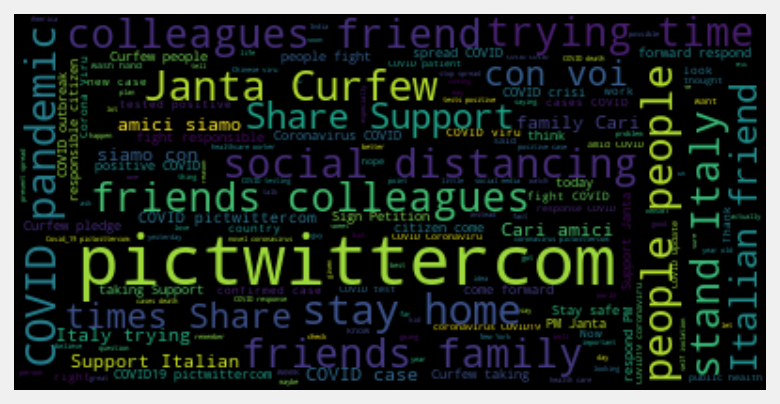

In [30]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(nostops_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")